In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#loading data
df=pd.read_csv("Bank_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Person_ID         1949 non-null   int64 
 1   Own_House         1949 non-null   int64 
 2   Own_vehicle       1949 non-null   int64 
 3   Monthly_Salary    1949 non-null   int64 
 4   Standard_Savings  1949 non-null   int64 
 5   Bank_Debts        1949 non-null   int64 
 6   Gender            1948 non-null   object
 7   Age               1949 non-null   int64 
 8   Name              1949 non-null   object
 9   Area              1949 non-null   object
dtypes: int64(7), object(3)
memory usage: 152.4+ KB


In [4]:

print(df.dtypes)

Person_ID            int64
Own_House            int64
Own_vehicle          int64
Monthly_Salary       int64
Standard_Savings     int64
Bank_Debts           int64
Gender              object
Age                  int64
Name                object
Area                object
dtype: object


In [5]:
df.columns

Index(['Person_ID', 'Own_House', 'Own_vehicle', 'Monthly_Salary',
       'Standard_Savings', 'Bank_Debts', 'Gender', 'Age', 'Name', 'Area'],
      dtype='object')

In [6]:
sns.set()
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [7]:
df.shape

(1949, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Person_ID         1949 non-null   int64 
 1   Own_House         1949 non-null   int64 
 2   Own_vehicle       1949 non-null   int64 
 3   Monthly_Salary    1949 non-null   int64 
 4   Standard_Savings  1949 non-null   int64 
 5   Bank_Debts        1949 non-null   int64 
 6   Gender            1948 non-null   object
 7   Age               1949 non-null   int64 
 8   Name              1949 non-null   object
 9   Area              1949 non-null   object
dtypes: int64(7), object(3)
memory usage: 152.4+ KB


In [9]:
df.head

<bound method NDFrame.head of       Person_ID  Own_House  Own_vehicle  Monthly_Salary  Standard_Savings  \
0             1          0            1           66278              3989   
1             2          0            0           64701              7076   
2             3          1            1           28045              5659   
3             4          0            0           21690              6314   
4             5          0            0           67479              9894   
...         ...        ...          ...             ...               ...   
1944       1945          1            1           67926              2166   
1945       1946          0            0           80183              1586   
1946       1947          1            1           96467              8345   
1947       1948          0            1           67360              4461   
1948       1949          0            0           88695              7387   

      Bank_Debts Gender  Age        Name     

<AxesSubplot:>

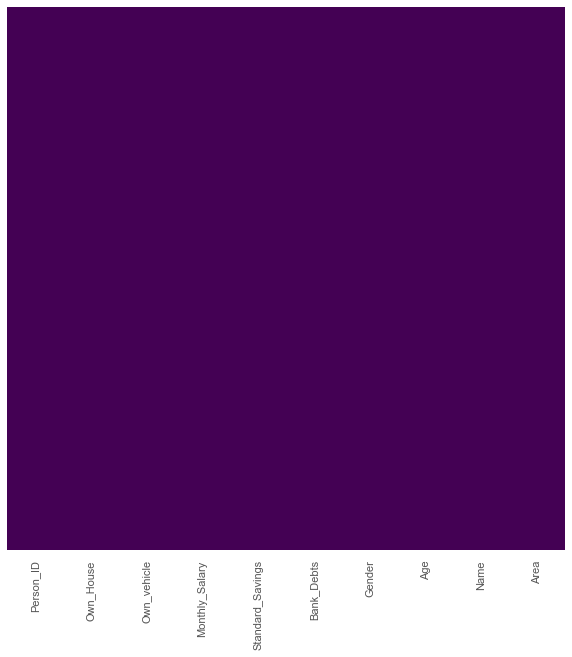

In [10]:
#check for missing values
plt.figure(figsize=(10,10))

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
df.dropna()

,Person_ID,Own_House,Own_vehicle,Monthly_Salary,Standard_Savings,Bank_Debts,Gender,Age,Name,Area
0,1,0,1,66278,3989,1,F,28,Con,Shenavan
1,2,0,0,64701,7076,1,M,65,Alphonso,Shubenka
2,3,1,1,28045,5659,1,F,25,Bordy,Chowṉêy
3,4,0,0,21690,6314,0,F,48,Margot,Pakxong
4,5,0,0,67479,9894,0,F,34,Denice,Ardazubre
...,...,...,...,...,...,...,...,...,...,...
1944,1945,1,1,67926,2166,1,M,32,Donny,5 de Mayo
1945,1946,0,0,80183,1586,0,F,27,Sallyann,Poja
1946,1947,1,1,96467,8345,0,M,32,Teddie,Jingmen
1947,1948,0,1,67360,4461,0,M,45,Philippine,San Vicente


In [13]:
Gender = pd.get_dummies(df['Gender'], drop_first=True)
Gender.head()

,M
0,0
1,1
2,0
3,0
4,0


In [14]:
Area = pd.get_dummies(df['Area'])
Area.head()

,5 de Mayo,Aban,Agbannawag,Aghsu,Agnibilékrou,Agoncillo,Agua Fría,Aguas Verdes,Agía Triáda,Aioi,...,Żabbar,Žacléř,Žďár,Крива Паланка,Нераште,Ростуша,Ḩawallī,Ḩuraytān,‘Alīābād-e Katūl,‘Izrā
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#Feature Selection 
newdata=df.iloc[:,3:8]
newdata

,Monthly_Salary,Standard_Savings,Bank_Debts,Gender,Age
0,66278,3989,1,F,28
1,64701,7076,1,M,65
2,28045,5659,1,F,25
3,21690,6314,0,F,48
4,67479,9894,0,F,34
...,...,...,...,...,...
1944,67926,2166,1,M,32
1945,80183,1586,0,F,27
1946,96467,8345,0,M,32
1947,67360,4461,0,M,45


In [42]:
newdata=newdata.drop(['Gender'],axis=1)
newdata

,Monthly_Salary,Standard_Savings,Bank_Debts,Age
0,66278,3989,1,28
1,64701,7076,1,65
2,28045,5659,1,25
3,21690,6314,0,48
4,67479,9894,0,34
...,...,...,...,...
1944,67926,2166,1,32
1945,80183,1586,0,27
1946,96467,8345,0,32
1947,67360,4461,0,45


In [43]:
#Importing Models
from sklearn.cluster import KMeans

In [62]:
kmeans=KMeans(n_clusters=5)

In [63]:
kmeans.fit(newdata)

KMeans(n_clusters=5)

In [64]:
kmeans.cluster_centers_

array([[6.16886512e+04, 5.42713953e+03, 5.11627907e-01, 3.53746770e+01,
        5.55111512e-16],
       [2.89138875e+04, 5.33101467e+03, 5.06112469e-01, 3.66454768e+01,
        2.00000000e+00],
       [7.68642282e+04, 5.42834103e+03, 4.89743590e-01, 3.61717949e+01,
        7.20512821e-01],
       [9.19255989e+04, 5.55505691e+03, 4.85094851e-01, 3.67831978e+01,
        1.00000000e+00],
       [4.52761091e+04, 5.61065990e+03, 5.25380711e-01, 3.55989848e+01,
        1.21319797e+00]])

In [65]:
print(kmeans.labels_) 
print(len(kmeans.labels_))

[0 0 1 ... 3 0 3]
1949


In [66]:
print(type(kmeans.labels_))
unique,counts=np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 385, 1: 409, 2: 390, 3: 369, 4: 396}


C:\Users\skris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\skris\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


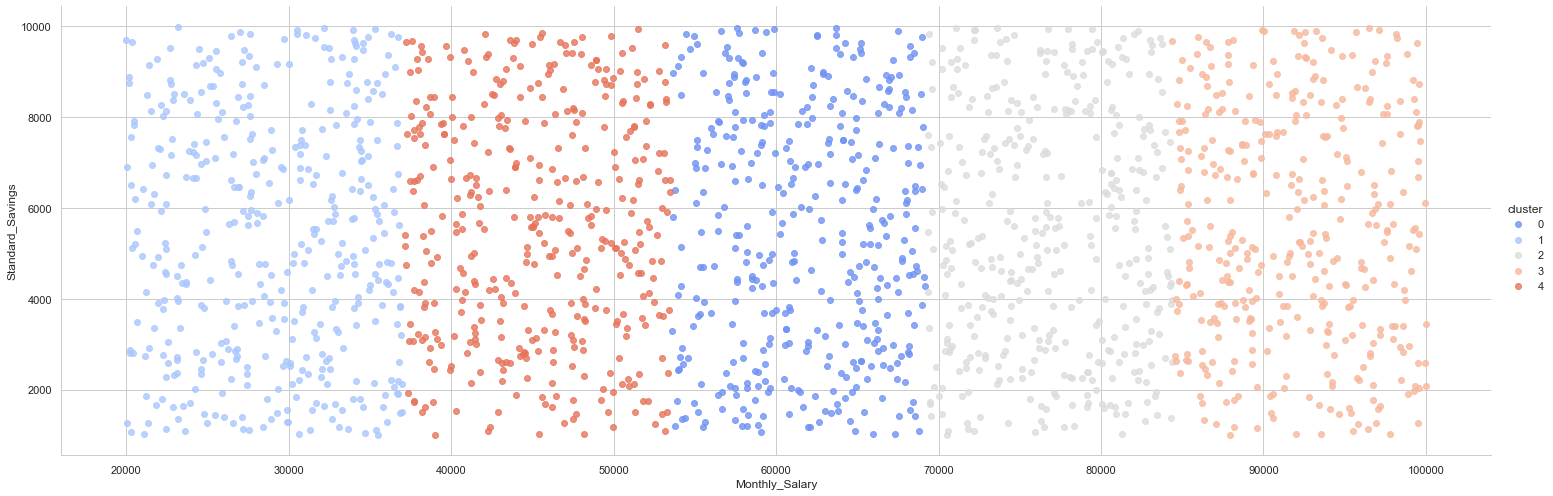

In [67]:
#plot the data between Monthly salary and standard Savings
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Monthly_Salary','Standard_Savings',data=newdata,hue='cluster',
           palette='coolwarm',size=7,aspect=3,fit_reg=False)

C:\Users\skris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\skris\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


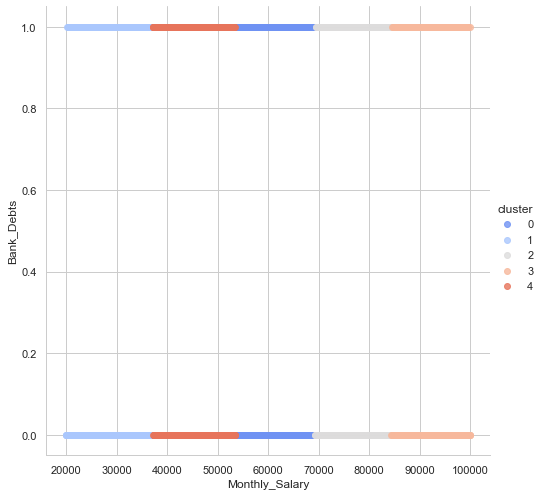

In [68]:
#plot the data between Monthly Salary and Bank debts 
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Monthly_Salary','Bank_Debts',data=newdata,hue='cluster',
           palette='coolwarm',size=7,aspect=1,fit_reg=False)

C:\Users\skris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\skris\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


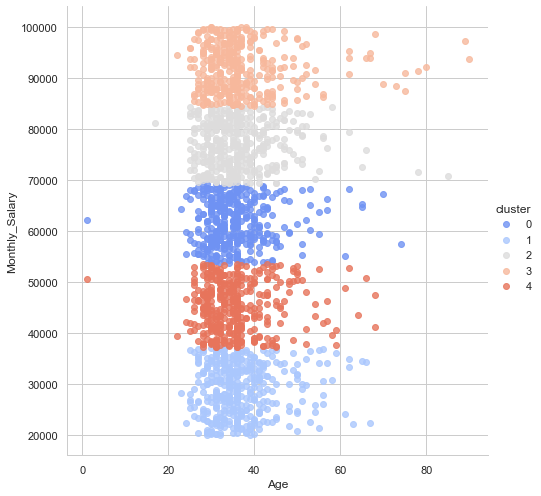

In [69]:
#plot the data between Age and Monthly Salary
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Age','Monthly_Salary',data=newdata,hue='cluster',
           palette='coolwarm',size=7,aspect=1,fit_reg=False)

C:\Users\skris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\skris\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


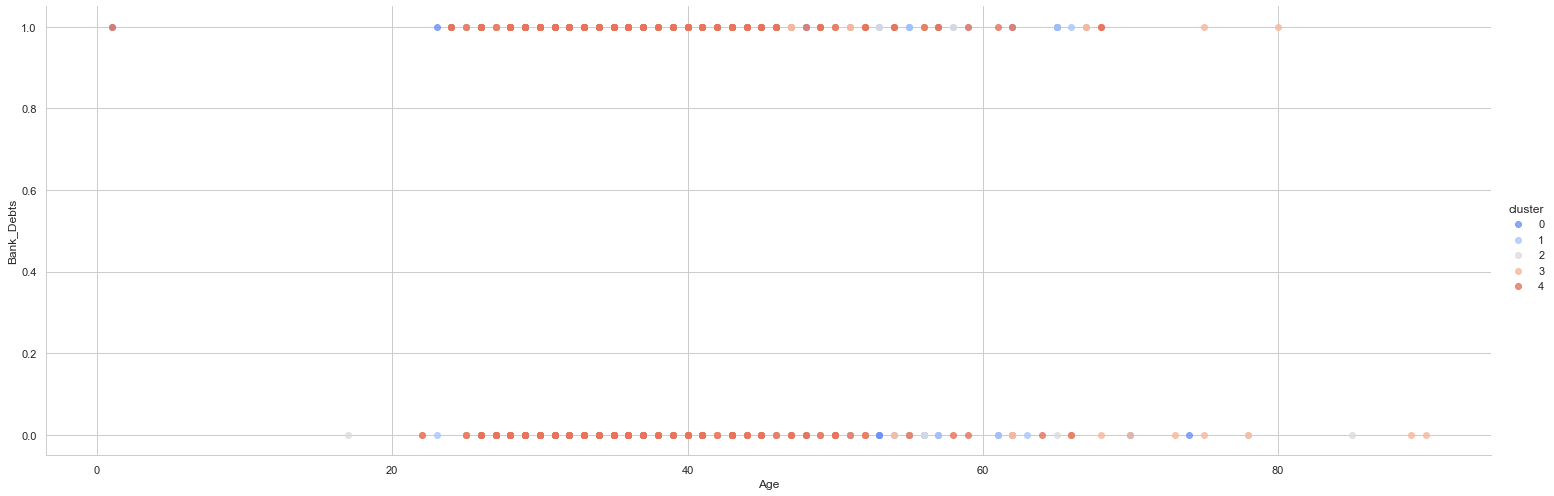

In [70]:
#plot the data Age and Bank Debts
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Age','Bank_Debts',data=newdata,hue='cluster',
           palette='coolwarm',size=7,aspect=3,fit_reg=False)

C:\Users\skris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\skris\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


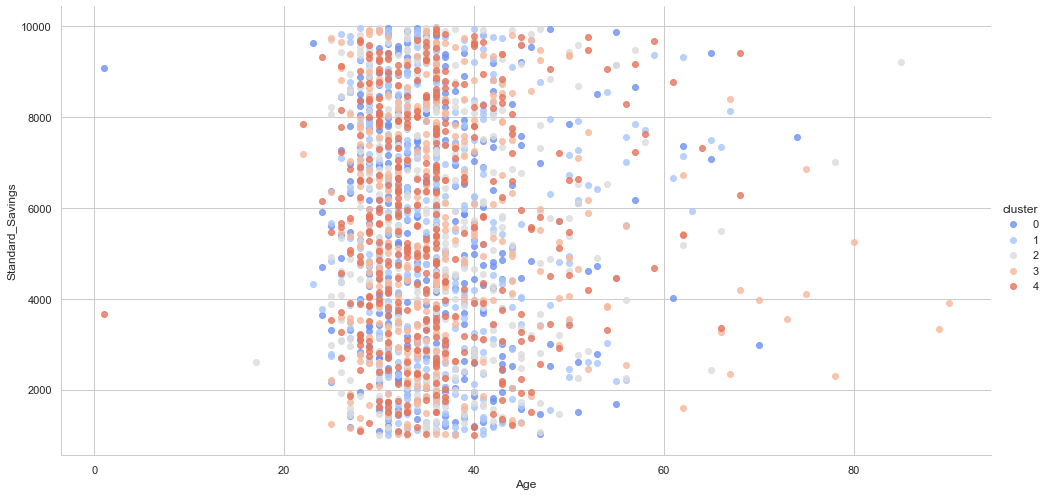

In [72]:
#plot the data Age and standard savings
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('Age','Standard_Savings',data=newdata,hue='cluster',
           palette='coolwarm',size=7,aspect=2,fit_reg=False)